In [1]:

# Requirements: Matplotlib, Numpy, functions_util.py, index.py#, fitting_functions_ZNE.py, h5py

import os

#Move the directory back to Duke_Data
#Check if the current directory is Duke_Data
if os.getcwd().split('/')[-1] != 'DUKE_ANALOG_ZNE_DATA':
    #os.chdir('Duke_Data')
    os.chdir('../')
    #print(os.getcwd().split('/')[-1])
    #pass
else:
    pass
#print(os.getcwd())
from index import print_index, get_experiment, index_folder
from functions_util import cetina_thermal_exp, cetina_envelope_exp
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.cm as cm
import numpy as np
import h5py
from fitting_functions_ZNE import linear_ZNE, third_no_first_ZNE


def fit(function, x_axis, y_axis, return_cov=False, p0=[.05,2000000], weights=None):
    # Fit the data to the function
    popt, pcov = curve_fit(function, x_axis, y_axis, p0=p0, sigma=weights, absolute_sigma=True, maxfev=10000)
    
    if return_cov:
        return popt, pcov
    return popt

In [2]:
# import all the useful lib in python
from matplotlib import artist as art
%matplotlib inline
import scipy as sp
# import pandas as pd
import pathlib
import os
import datetime as dt
import glob
from IPython.display import clear_output
from numpy.fft import fft, ifft

from h5analysis import *
from qsim_functions import*


In [3]:
heating_folder = 'PRE_JIJ_FIRST_MEASURE'
data_folder = 'J_IJ_EXPERIMENT'
str_len = 7

data_names = ['475','483','482','481','480','479','478','477','476']
waiting_times = [0.000000, 0.107721, 0.358689, 0.717377, 0.956503, 1.195628, 1.793443, 2.391257, 3.231640]
heating_names = ['423','424', '425', '426', '427', '428', '429','430', '431']
full_data_folder_path = './data/' + data_folder + '/'

data_names = [str(name) for name in data_names]
for name_index in range(len(data_names)):
    name = data_names[name_index]
    if '000558' in data_names:
        pass
    else:
        name = '000558' + name
        data_names[name_index] = name
heating_names = [str(name) for name in heating_names]
for name_index in range(len(heating_names)):
    name = heating_names[name_index]
    if '000558' in heating_names:
        pass
    else:
        name = '000558' + name
        heating_names[name_index] = name

wait_times = [0.000000, 0.291901, 0.875704, 1.751409, 2.335212, 2.919015, 4.378522, 5.838029, 8.757044]
Thetaslope = 0.021695443281757872
Intercept =  0.06347658495103803
thetas_list = np.array(wait_times)*Thetaslope + Intercept

In [4]:
COUNTS_THRESHOLD = 1
print(os.getcwd())

ising_exp_times = []
fname='Ising_Simulation.dat'
tsteps=[]
ion_data = []
print(full_data_folder_path+fname)
with open (full_data_folder_path+fname) as data_file :
    for line in data_file :
        line_list = line.strip('\n').split ('\t')
        tsteps.append(float (line_list[0]))
        ion_data.append(line_list[1:])
print(np.array(ion_data).shape)

/Users/thomassteckmann/Duke_Analog_ZNE_data
./data/J_IJ_EXPERIMENT/Ising_Simulation.dat
(51, 7)


In [5]:
results = np.zeros((len(data_names), 30))
for file_id in data_names:
    data, x_values = get_data_from_file(full_data_folder_path + file_id + '-RFSoCSequence.h5')
    ising_exp_times = x_values
    n_pmts, n_shots, n_scan = data.shape
    pmt_ind = np.array([i for i in range(n_pmts)])
    data2=data[pmt_ind]
    # print(data[:,1])
    # np.array([np.mean([da[0],avg_mag[12]],axis=0),np.mean([avg_mag[1],avg_mag[11]],axis=0),np.mean([avg_mag[2],avg_mag[10]],axis=0),np.mean(avg_mag[3:10],axis=0)])
    data = (data*2 - 1)
    avg_mag=np.average(data,axis=1)
    # print('avgmag',avg_mag.shape)
    i0=int((n_pmts-str_len)/2)
    ifin=int((n_pmts+str_len)/2)
    avg_mag=avg_mag[i0:ifin]
    tmp=avg_mag[1]
    # avg_mag=avg_mag[4:11]
    # print('avg mag',np.shape(avg_mag))
    ion_avg_mag=np.mean(avg_mag,axis=0)
    #color = 
    results[data_names.index(file_id)] = avg_mag[3]
    #plt.plot()
    #plt.plot(x_values,avg_mag[4])
    #plt.show()
    

Text(0, 0.5, 'Expecation <X>_3')

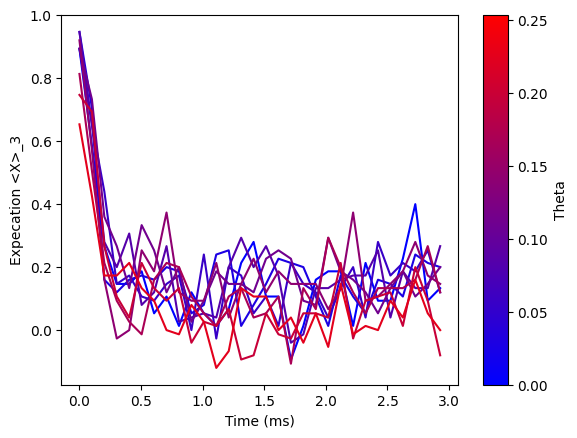

In [6]:
fig, ax = plt.subplots()
cmap = LinearSegmentedColormap.from_list("mycmap", ["blue", "red"])
for i in range(len(thetas_list)):
    ax.plot(ising_exp_times, results[i,:], color=cmap(i/len(thetas_list)))



sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=0, vmax=max(thetas_list)))
sm.set_array([])
cbar = fig.colorbar(sm,  ax=ax, aspect=15)
cbar.set_label('Theta')
ax.set_xlabel('Time (ms)')
ax.set_ylabel('Expecation <X>_3')
#cbar.set_ticks([min(thetas_list), max(thetas_list)])
#cbar.set_ticklabels([min(thetas_list), max(thetas_list)])


In [7]:
def fit(function, x_axis, y_axis, return_cov=False, p0=[.05,2000000], weights=None):
    # Fit the data to the function
    popt, pcov = curve_fit(function, x_axis, y_axis, p0=p0, sigma=weights, absolute_sigma=True, maxfev=10000)
    
    if return_cov:
        return popt, pcov
    return popt

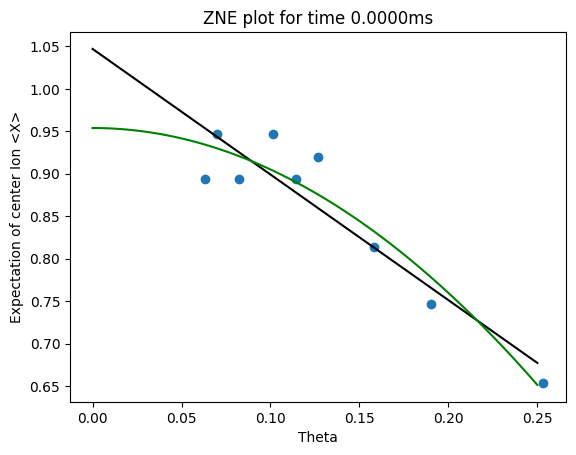

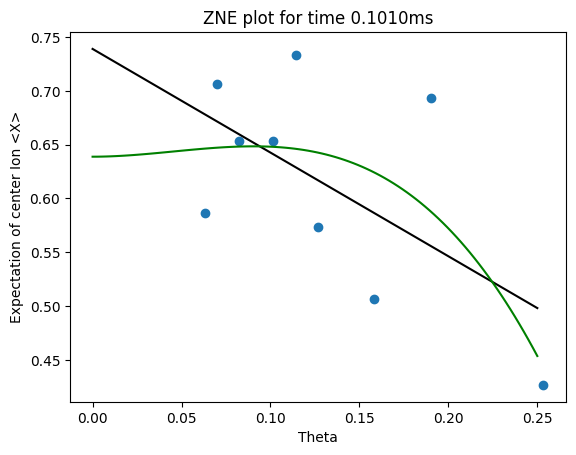

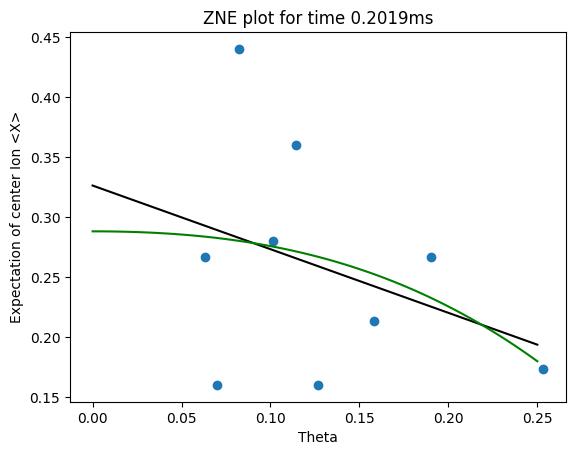

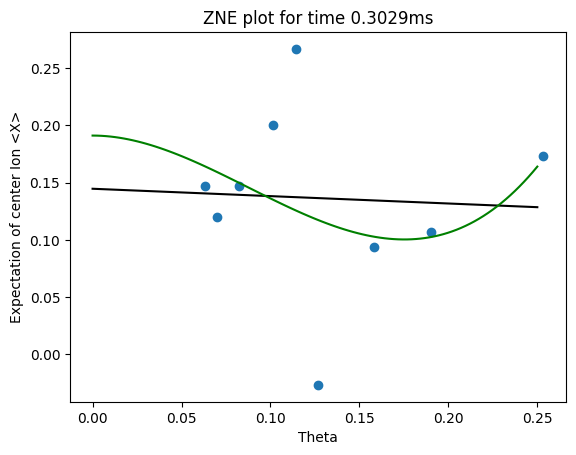

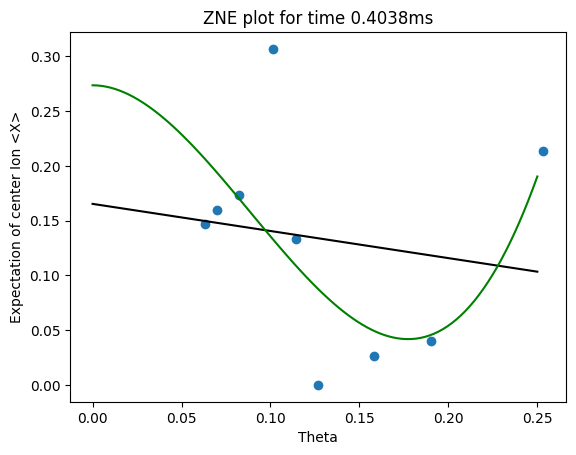

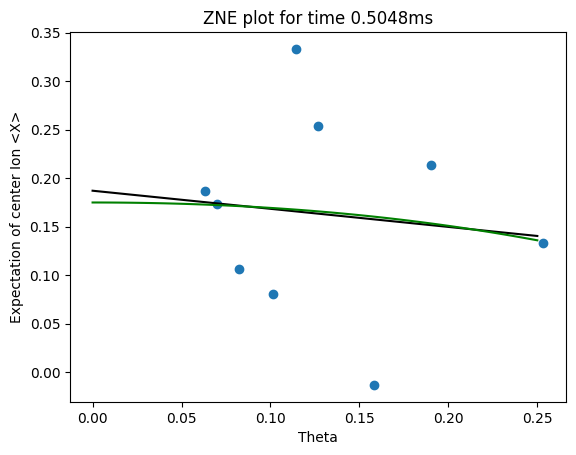

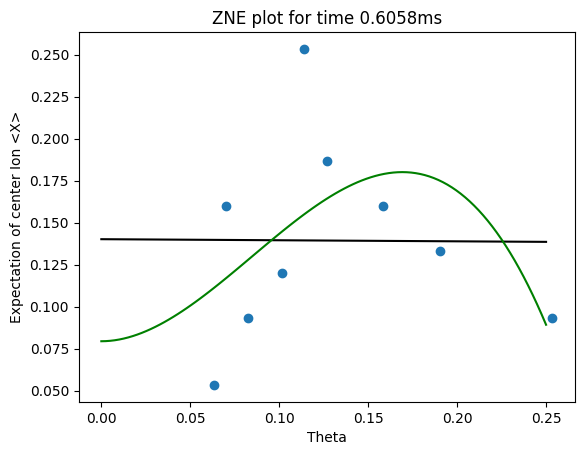

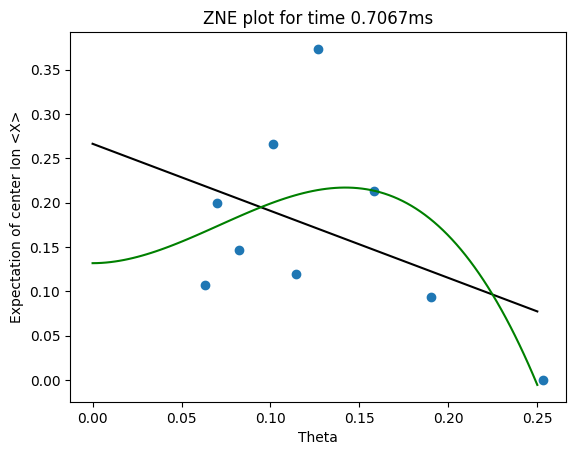

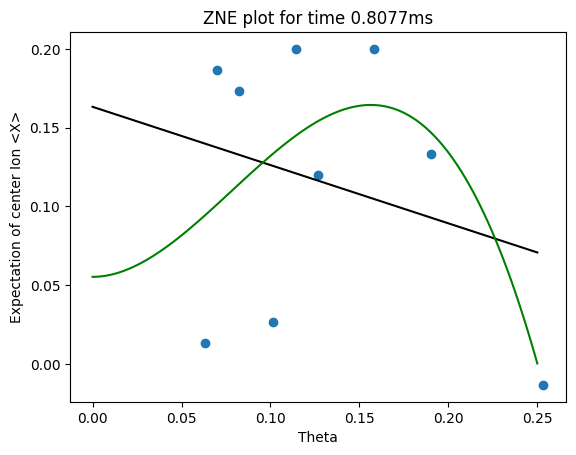

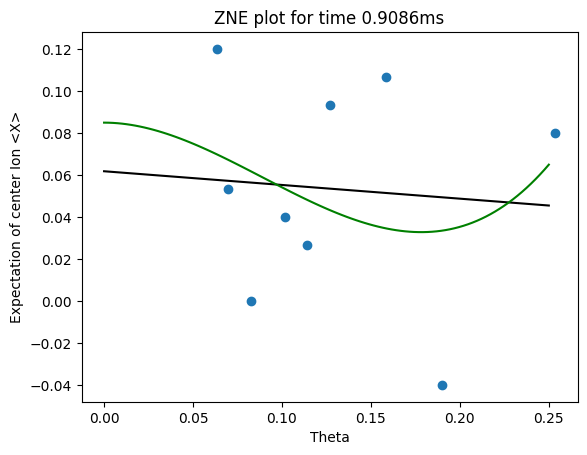

In [8]:
#Plot vs. thetas_list for the first 4 data points:
thetas_dense = np.linspace(0, .25, 100)
for i in range(10):
    plt.scatter(thetas_list, results[:,i])
    #fit to linear and third_no_first
    fit_linear = linear_ZNE( thetas_list, results[:,i])
    fit_third_no_first = third_no_first_ZNE( thetas_list, results[:,i])
    plt.plot(thetas_dense, fit_linear(thetas_dense), color='black')
    plt.plot(thetas_dense, fit_third_no_first(thetas_dense), color='green')
    plt.xlabel('Theta')
    plt.ylabel('Expectation of center Ion <X>')
    plt.title('ZNE plot for time {:.4f}ms'.format(x_values[i]))
    plt.show()
    